In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
currdir = os.getcwd()

In [3]:
os.listdir(currdir)

['.ipynb_checkpoints',
 '740_1375_compressed_Chicago_Crimes_2001_to_2004.csv.zip',
 '740_1375_compressed_Chicago_Crimes_2005_to_2007.csv.zip',
 '740_1375_compressed_Chicago_Crimes_2008_to_2011.csv.zip',
 'aclImdb',
 'aclImdb.zip',
 'Avocado Price Prediction.ipynb',
 'avocado.csv',
 'CaliforniPricePrediction.ipynb',
 'Car Price Prediction.ipynb',
 'Car_Purchasing_Data.csv',
 'ChicagoCrimeRatePredictions.ipynb',
 'Chicago_Crimes_2001_to_2004.csv',
 'Chicago_Crimes_2005_to_2007.csv',
 'Chicago_Crimes_2008_to_2011.csv',
 'cifar-10-python.tar.gz',
 'CIFAR10.ipynb',
 'cifar10_model_1.h5',
 'Codalab',
 'datasets',
 'EmailForecasting.ipynb',
 'emails.csv',
 'glove.6B.zip',
 'gloveDir',
 'Hackerearth',
 'jena_climate_2009_2016.csv',
 'jena_climate_2009_2016.csv.zip',
 'Kaggle',
 'MNIST Dataset classification.ipynb',
 'pre_trained_glove_model.h5',
 'TemperatureForecasting.ipynb',
 'traffic-signs-data',
 'TrafficSignClassification.ipynb',
 'Untitled.ipynb']

In [4]:
email_dataset = pd.read_csv('emails.csv')

In [5]:
email_dataset

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [8]:
email_dataset.head(15)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [11]:
email_dataset.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [12]:
email_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [13]:
email_dataset['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [14]:
ham_data = email_dataset[email_dataset['spam'] == 0]
spam_data = email_dataset[email_dataset['spam'] == 1]

In [15]:
ham_data

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [16]:
spam_data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [21]:
print(f"Percentage of spam emails present in our dataframe {len(spam_data)/len(email_dataset)}")

Percentage of spam emails present in our dataframe 0.2388268156424581


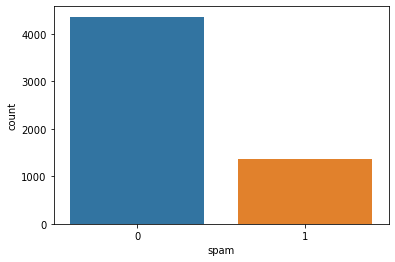

In [22]:
sns.countplot(email_dataset['spam'] , label = "Spam Vs Ham",)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
transformed_values = vectorizer.fit_transform(email_dataset['text'])

In [25]:
transformed_values.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
labels = email_dataset['spam']

In [29]:
labels

0       1
1       1
2       1
3       1
4       1
       ..
5723    0
5724    0
5725    0
5726    0
5727    0
Name: spam, Length: 5728, dtype: int64

In [30]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(transformed_values,labels)

MultinomialNB()

In [31]:
testing_samples = ['Hi,How are you?','I miss you','Fee! Free! Free!']
testing_samples_vectorizer = vectorizer.transform(testing_samples)

In [33]:
predictions = NB_classifier.predict(testing_samples_vectorizer)

In [34]:
predictions

array([0, 0, 1], dtype=int64)

In [35]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( transformed_values,labels,test_size = 0.2)

In [36]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train,y_train)

MultinomialNB()

In [37]:
predictions = NB_classifier.predict(x_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,predictions)

In [39]:
cm

array([[866,   9],
       [  2, 269]], dtype=int64)

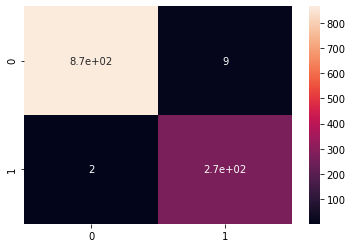

In [43]:
sns.heatmap(cm,annot = True)

In [44]:
report = classification_report(y_test,predictions)

In [46]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       875
           1       0.97      0.99      0.98       271

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

